In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data loading from csv

data_1은 수정주가, 종가, 상장주식수에 대한 데이터,
data_2는 총자본, 당기순이익, 매출총이익, 총자산에 대한 데이터이다

In [2]:
data_one='C:\\Users\\SUN\\Desktop\\2022\\2학기\\Finance and ML\\Assignments\\Assignment2\\retry\\data_1.csv'
data_two='C:\\Users\\SUN\\Desktop\\2022\\2학기\\Finance and ML\\Assignments\\Assignment2\\retry\\data_2.csv'

data_1 =pd.read_csv(data_one, encoding = 'CP949', low_memory = False, thousands = ',')
data_2 =pd.read_csv(data_two, encoding = 'CP949', low_memory = False, thousands = ',')

In [3]:
data_1.head()

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2005-01-31,2005-02-28,2005-03-31,2005-04-30,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,A000020,동화약품,SSC,S410007700,수정주가 (현금배당반영)(원),MONTHLY,1482.0,1860.0,1772.0,1651.0,...,14329.0,11483.0,12415.0,13397.0,12464.0,11679.0,9510.0,10354.0,9864.0,8107.0
1,A000020,동화약품,SSC,S41000060F,종가(원),MONTHLY,10200.0,12800.0,11700.0,10900.0,...,14600.0,11700.0,12650.0,13650.0,12700.0,11900.0,9690.0,10550.0,10050.0,8260.0
2,A000020,동화약품,SSC,S41000100F,상장주식수(주),MONTHLY,5586294.0,5586294.0,5586294.0,5586294.0,...,27931470.0,27931470.0,27931470.0,27931470.0,27931470.0,27931470.0,27931470.0,27931470.0,27931470.0,27931470.0
3,A000040,KR모터스,SSC,S410007700,수정주가 (현금배당반영)(원),MONTHLY,2596.0,3115.0,3757.0,3115.0,...,865.0,764.0,784.0,889.0,823.0,769.0,619.0,728.0,691.0,638.0
4,A000040,KR모터스,SSC,S41000060F,종가(원),MONTHLY,425.0,510.0,615.0,510.0,...,865.0,764.0,784.0,889.0,823.0,769.0,619.0,728.0,691.0,638.0


In [4]:
data_2.head()

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2005-03-31,2005-06-30,2005-09-30,2005-12-31,...,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31
0,A000020,동화약품,NFS-IFRS(M),M000903001,총자본(천원),ANNUAL,151078190.0,155725978.0,155725978.0,155725978.0,...,299708393.0,299708393.0,342682240.0,342682240.0,342682240.0,342682240.0,360133220.0,360133220.0,360133220.0,360133220.0
1,A000020,동화약품,NFS-IFRS(M),M000908001,당기순이익(천원),ANNUAL,7424207.0,7661989.0,7661989.0,7661989.0,...,9107598.0,9107598.0,28715102.0,28715102.0,28715102.0,28715102.0,19582802.0,19582802.0,19582802.0,19582802.0
2,A000020,동화약품,NFS-IFRS(M),M000904007,매출총이익(천원),ANNUAL,66126908.0,73907397.0,73907397.0,73907397.0,...,121596486.0,121596486.0,138665954.0,138665954.0,138665954.0,138665954.0,149346988.0,149346988.0,149346988.0,149346988.0
3,A000020,동화약품,NFS-IFRS(M),M000901001,총자산(천원),ANNUAL,195293494.0,192629355.0,192629355.0,192629355.0,...,376357482.0,376357482.0,433807800.0,433807800.0,433807800.0,433807800.0,447804487.0,447804487.0,447804487.0,447804487.0
4,A000040,KR모터스,NFS-IFRS(M),M000903001,총자본(천원),ANNUAL,42713327.0,42713327.0,42713327.0,42713327.0,...,35210017.0,35210017.0,49845054.0,49845054.0,49845054.0,49845054.0,50225636.0,50225636.0,50225636.0,50225636.0


# Preprocessing data

In [5]:
def Preprocessing_data(one, two):
    #종목코드, Item Name, Dates의 항목만 남기도록 정리한다.
    set_one=one.drop(['Symbol Name', 'Kind', 'Item', 'Frequency'], axis=1) 
    set_two=two.drop(['Symbol Name', 'Kind', 'Item', 'Frequency'], axis=1)

    #datetime형식의 columns를 문자열로 바꿔준다(data_1)
    #[0:7]은 날짜의 글자 갯수이다. ex) '2005-05'는 일곱 글자다.
    new_columns_one=[set_one.columns[2:][i][0:7] for i in range(len(set_one.columns[2:]))]
    #new_columns_one=[]
    #for i in range(len(set_one.columns[2:])):    
        #csv 파일은 dates columns이 str으로 저장되어있으므로 연,월만 보여주고 일은 slice해준다.
        #new_columns_one.append(set_one.columns[2:][i][0:7])        
        #xlxs 파일이라면 strftime함수를 사용하여 slice해줘야한다
        #new_columns_one.append(set_one.columns[2:][i].strftime("%Y-%m"))
        
    #기존의 Symbol과 Item Name을 추가하여 새로운 columns으로 교체한다(data_1)
    new_columns_one.insert(0,'Item Name')
    new_columns_one.insert(0,'Symbol')
    set_one.columns=new_columns_one
    
    #datetime형식의 columns를 문자열로 바꿔준다(data_2)
    new_columns_two=[set_two.columns[2:][i][0:7] for i in range(len(set_two.columns[2:]))]
    #new_columns_two=[]
    #for i in range(len(set_two.columns[2:])):    
        #csv 파일은 dates columns이 str으로 저장되어있으므로 연,월만 보여주고 일은 slice해준다.
        #new_columns_two.append(set_two.columns[2:][i][0:7]) 
        #xlxs 파일이라면 strftime함수를 사용하여 바꿔줘야한다
        #new_columns_two.append(set_two.columns[2:][i].strftime("%Y-%m"))
        
    #기존의 Symbol과 Item Name을 추가하여 새로운 columns으로 교체한다(data_2)
    new_columns_two.insert(0,'Item Name')
    new_columns_two.insert(0,'Symbol')
    set_two.columns=new_columns_two
    
    #Dates columns항목을 row로 전환하기 위해 melt함수를 사용한다
    to_rows_one=pd.melt(set_one, id_vars=['Symbol','Item Name'], 
               value_vars=set_one.columns[2:],var_name="dates").sort_values(by=['Symbol','dates'])
    to_rows_two=pd.melt(set_two, id_vars=['Symbol','Item Name'], 
               value_vars=set_two.columns[2:],var_name="dates").sort_values(by=['Symbol','dates'])
    #Row로 된 Item Name항목을 column로 전환하기 위해 pivot함수를 사용한다
    to_columns_one=pd.pivot(to_rows_one, index=['Symbol','dates'], columns = 'Item Name', values = 'value')
    to_columns_two=pd.pivot(to_rows_two, index=['Symbol','dates'], columns = 'Item Name', values = 'value')
    #전환된 Item Name columns의 순서를 원래대로 바꿔줄 수 있다(data_1)
    order_column_one=to_columns_one[['수정주가 (현금배당반영)(원)', '종가(원)', '상장주식수(주)']]
    order_column_one=order_column_one.astype({'수정주가 (현금배당반영)(원)':'float',
                                             '종가(원)':'float',
                                             '상장주식수(주)':'float'})
    #단위를 맞춰주기 위해 총자본과 당기순이익, 매출총이익, 총자산에 대한 data_2에 0.001을 곱해준다
    to_columns_two.columns=['총자본(원)', '당기순이익(원)','매출총이익(원)','총자산(원)']
    scaled_column_two=to_columns_two.astype({'총자본(원)':'float',
                                             '당기순이익(원)':'float',
                                             '매출총이익(원)':'float',
                                             '총자산(원)':'float'
                                             })
    scaled_column_two=to_columns_two.mul(1000)
    #다루기 편리하도록 정리된 데이터를 복사한다
    copy_data_one=order_column_one.copy()
    copy_data_two=scaled_column_two.copy()
    
    #merge를 통해 두 데이터를 합친다
    united_data=pd.merge(left = copy_data_one , right = copy_data_two, 
                         how = "outer", on = ['Symbol','dates'])

    #시가총액을 구하여 column으로 추가한다(data_1)
    united_data['시가총액']=united_data['종가(원)']*united_data['상장주식수(주)']
        
    #Per, Pbr, Roe column 만들기
    #copy를 통해 앞으로 발생할 warning을 사전방지한다
    united_data=united_data.copy()
    
    #Fama-French method로 전년도 사업보고서 annual data를 참고하도록 재무제표 데이터를 한 해씩 밀어냈다
    united_data['총자본(Fama)'] =united_data.groupby('Symbol')['총자본(원)'].transform(lambda x: x.shift(12))
    united_data['당기순이익(Fama)'] =united_data.groupby('Symbol')['당기순이익(원)'].transform(lambda x: x.shift(12))
    united_data['매출총이익(Fama)'] =united_data.groupby('Symbol')['매출총이익(원)'].transform(lambda x: x.shift(12))
    united_data['총자산(Fama)'] =united_data.groupby('Symbol')['총자산(원)'].transform(lambda x: x.shift(12))
        
    #수정된  항목만 남기도록 정리한다.
    united_data=united_data.drop(['총자본(원)', '당기순이익(원)','매출총이익(원)','총자산(원)'], axis=1) 
    
    #Pbr(Book-to-market) column 만들기
    #날짜를 수정한 재무 데이터와 시가총액으로 계산한 pbr column을 만든다
    united_data=united_data.copy()
    united_data['pbr(Book-to-market)']=united_data['총자본(Fama)']/united_data['시가총액']
    
    #GP/A (매출액 – 매출원가)/(자산장부가) column 만들기
    united_data=united_data.copy()
    united_data['gp/a']=united_data['매출총이익(Fama)']/united_data['총자산(Fama)'] 
       
    
    #Per(Earnings-to-market)  column 만들기
    #날짜를 수정한 재무 데이터와 시가총액으로 계산한 per column을 만든다
    united_data['per(Earnings-to-market)']=united_data['당기순이익(Fama)']/united_data['시가총액']
    #Roe(Book-to-Earnings) column 만들기
    united_data['Roe(Book-to-Earnings)']=united_data['당기순이익(Fama)']/united_data['총자본(Fama)']  
    #투자심리도 column 만들기
    #수정주가가 전월대비 상승인지 하락인지의 여부를 카운트하여 평균을 낸다
    united_data['Up_or_Down']=united_data.groupby('Symbol')['수정주가 (현금배당반영)(원)'].transform(lambda x: x.pct_change()>=0)
    united_data['투자심리도']=united_data.groupby('Symbol')['Up_or_Down'].transform(lambda x: x.rolling(window=12).mean())
    united_data['rate of return']= united_data.groupby('Symbol')['수정주가 (현금배당반영)(원)'].transform(lambda x: x.pct_change())
    
    #rank에 필요한 columns만 남긴다
    final_data=united_data.copy()
    final_data=final_data[['수정주가 (현금배당반영)(원)','시가총액','rate of return','pbr(Book-to-market)',
                           'per(Earnings-to-market)','Roe(Book-to-Earnings)','gp/a','투자심리도']]

    #Dates를 기준으로 종목들을 나열한다
    #우선 index를 reset한다
    final_data=final_data.reset_index(drop=False)
    #Dates를 기준으로 index를 설정한다
    final_data=final_data.set_index(['dates','Symbol'])
    final_data=final_data.sort_index(ascending=True)
    
    return final_data

In [6]:
final=Preprocessing_data(data_1,data_2)
final.tail()

수정주가 (현금배당반영)(원)          시가총액  rate of return  \
dates   Symbol                                                    
2022-09 A950170            3500.0  1.225193e+11        0.102362   
        A950190           14151.0  1.935135e+11       -0.219212   
        A950200            7240.0  1.388419e+11        0.306859   
        A950210            7900.0  4.747596e+11       -0.291480   
        A950220            3345.0  3.302904e+11       -0.280645   

                 pbr(Book-to-market)  per(Earnings-to-market)  \
dates   Symbol                                                  
2022-09 A950170            -0.753647                -0.067969   
        A950190             0.156941                 0.342832   
        A950200            -0.050860                 0.042267   
        A950210            -0.445384                 0.000000   
        A950220            -0.158898                 0.000000   

                 Roe(Book-to-Earnings)      gp/a     투자심리도  
dates   Symbol                                              
2022-09 A950170               0.090187  0.115624  0.583333  
        A950190               2.184462  0.912325  0.416667  
        A950200              -0.831045  0.689267  0.333333  
        A950210              -0.000000  0.860193  0.250000  
        A950220              -0.000000  0.866410  0.250000

# Adding columns representing each rank

In [7]:
def ranking_table(table):
    table['시가총액 filter']=((table['시가총액']>100000000000).replace(False, np.NaN)).replace(1,0)
    table['Pbr 순위']=table.groupby('dates')['pbr(Book-to-market)'].transform(lambda x: x.rank(ascending=False, pct = True))
    table['GP/A 순위']=table.groupby('dates')['gp/a'].transform(lambda x: x.rank(ascending=False, pct = True))
    table['Per 순위']=table.groupby('dates')['per(Earnings-to-market)'].transform(lambda x: x.rank(ascending=False, pct = True))
    table['Roe 순위']=table.groupby('dates')['Roe(Book-to-Earnings)'].transform(lambda x: x.rank(ascending=False, pct = True))
    table['투자심리도 순위']=table.groupby('dates')['투자심리도'].transform(lambda x: x.rank(pct = True))
    
    table=table.copy()
    
    table['순위 합']=(table['시가총액 filter']+table['Pbr 순위'].mul(0.1)+table['Per 순위'].mul(0.25)+table['Roe 순위'].mul(0.2)
                     +table['GP/A 순위'].mul(0.35)+table['투자심리도 순위'].mul(0.1))

    table['최종 순위']=table.groupby('dates')['순위 합'].rank(pct = True)
    
    table=table[['수정주가 (현금배당반영)(원)','rate of return','시가총액 filter','Pbr 순위','Per 순위','Roe 순위'
                 ,'GP/A 순위','투자심리도 순위','순위 합','최종 순위']]

    return table

In [8]:
ranking=ranking_table(final)
ranking

수정주가 (현금배당반영)(원)  rate of return  시가총액 filter    Pbr 순위  \
dates   Symbol                                                             
2005-01 A000020            1482.0             NaN          NaN       NaN   
        A000040            2596.0             NaN          NaN       NaN   
        A000050            3780.0             NaN          0.0       NaN   
        A000070           23157.0             NaN          0.0       NaN   
        A000080               NaN             NaN          NaN       NaN   
...                           ...             ...          ...       ...   
2022-09 A950170            3500.0        0.102362          0.0  0.988019   
        A950190           14151.0       -0.219212          0.0  0.199401   
        A950200            7240.0        0.306859          0.0  0.813436   
        A950210            7900.0       -0.291480          0.0  0.972187   
        A950220            3345.0       -0.280645          0.0  0.907574   

                   Per 순위    Roe 순위   GP/A 순위  투자심리도 순위      순위 합     최종 순위  
dates   Symbol                                                               
2005-01 A000020       NaN       NaN       NaN       NaN       NaN       NaN  
        A000040       NaN       NaN       NaN       NaN       NaN       NaN  
        A000050       NaN       NaN       NaN       NaN       NaN       NaN  
        A000070       NaN       NaN       NaN       NaN       NaN       NaN  
        A000080       NaN       NaN       NaN       NaN       NaN       NaN  
...                   ...       ...       ...       ...       ...       ...  
2022-09 A950170  0.985879  0.719866  0.976900  0.888409  0.920001  1.000000  
        A950190  0.366709  0.481730  0.034859  0.491780  0.269342  0.048327  
        A950200  0.861789  0.837043  0.343133  0.262639  0.610560  0.778439  
        A950210  0.958066  0.738765  0.097438  0.115906  0.530182  0.628253  
        A950220  0.958066  0.738765  0.088198  0.115906  0.520487  0.609665  

[518297 rows x 10 columns]

# Labeling groups according to ranks

In [9]:
def get_group(part_ranking, number_of_group):    
    
    group_names=[str(j+1) for j in range(number_of_group)]
    #group_names=[]
    #for j in range(number_of_group):
        #group_names.append(str(j+1))        
    # 또는 group_names=str(np.arrage(number_of_group)+1)
    
    for num, name in enumerate(group_names):
        part_ranking.loc[(part_ranking['최종 순위'] >= (num*(1/number_of_group)))
                         & (part_ranking['최종 순위'] <= (num+1)*(1/number_of_group)), 'Group'] = name
     
    return part_ranking[['수정주가 (현금배당반영)(원)','rate of return','Group']]

In [10]:
final_group=get_group(ranking, number_of_group=5)
final_group

수정주가 (현금배당반영)(원)  rate of return Group
dates   Symbol                                         
2005-01 A000020            1482.0             NaN   NaN
        A000040            2596.0             NaN   NaN
        A000050            3780.0             NaN   NaN
        A000070           23157.0             NaN   NaN
        A000080               NaN             NaN   NaN
...                           ...             ...   ...
2022-09 A950170            3500.0        0.102362     5
        A950190           14151.0       -0.219212     1
        A950200            7240.0        0.306859     4
        A950210            7900.0       -0.291480     4
        A950220            3345.0       -0.280645     4

[518297 rows x 3 columns]

# Rebalancing portfolio for one-year period
리벨런싱 시점의 포트폴리오를 1년간 유지하도록 데이터를 가공

In [11]:
def fill_group(unfilled_table):
    unfilled_table=unfilled_table.copy()
    #먼저 인덱스를 저장해둔다. 왜냐하면 pd.merge를 하기위해 인덱스를 조정해야하는데, 나중에 복구할 때 필요하기 때문이다.
    p=unfilled_table.index.get_level_values(0)
    #새로운 column으로도 만들어준다. 이 column을 조작 하여 새로운 column을 만들 것이다.
    unfilled_table['new_months']=unfilled_table.index.get_level_values(0)
    #매년 6월 리벨런싱을 위하여 6월달의 데이터만 따로 만든다.
    b=unfilled_table[unfilled_table['new_months'].str.contains('-06')]
    b.columns=['수정주가 (현금배당반영)(원)','rate of return','Group','matchingMonth']
    #b와 매칭하기 위한 column을 만들어준다.
    unfilled_table['matchingMonth']= (unfilled_table['new_months'].str.slice(start=0, stop=4).astype(int) 
                               - (unfilled_table['new_months'].str.slice(start=6, stop=7).astype(int)<6)).astype(str) + '-06'
    
    #merge를 위해 index를 조작한다.
    unfilled_table=unfilled_table.reset_index(level=['Symbol','dates'])
    unfilled_table=unfilled_table.drop(['dates'], axis=1)
    unfilled_table=unfilled_table.set_index(['Symbol','matchingMonth'])
    #merge
    really_total=pd.merge(unfilled_table, b[['matchingMonth','Group']], on=['matchingMonth','Symbol'],how='left')
    #date index를 원래대로 설정해준다.
    really_total.index=[p,really_total.index]
    
    #필요없는 columns를 제거한다.
    really_total=really_total.drop(['matchingMonth','Group_x', 'new_months'], axis=1)
    #최종 columns 이름 바꾸기
    really_total.columns=['수정주가 (현금배당반영)(원)','rate of return', 'Group']
    
    return really_total

In [12]:
really=fill_group(final_group)
really

수정주가 (현금배당반영)(원)  rate of return Group
dates   Symbol                                         
2005-01 A000020            1482.0             NaN   NaN
        A000040            2596.0             NaN   NaN
        A000050            3780.0             NaN   NaN
        A000070           23157.0             NaN   NaN
        A000080               NaN             NaN   NaN
...                           ...             ...   ...
2022-09 A950170            3500.0        0.102362     5
        A950190           14151.0       -0.219212     1
        A950200            7240.0        0.306859     4
        A950210            7900.0       -0.291480     3
        A950220            3345.0       -0.280645     4

[518297 rows x 3 columns]

# Backtesting
지금까지 만든 함수들과 데이터를 바탕으로 backtest를 진행하는 함수를 만든다

In [13]:
def backtest(filled_table, start_year, end_year):
    #6월말에 시작하면 7월말에 수익률이 산출되므로 수익률 계산 시작월을 7월로 맞춰준다. 
    filled_table=filled_table.loc[start_year+'-07':end_year+'-06']
    #initial money를 1원의 개념으로 보고 uniform하게 비중을 두어 종목투자를 한것을 rate of return의 mean으로 계산했다.
    total_portfolio=filled_table.groupby(['dates','Group'])[['rate of return']].mean()
    total_portfolio['return']=total_portfolio['rate of return']+1
    #복리개념의 cumulative product를 계산했다.
    total_portfolio['Portfolio']=total_portfolio.groupby('Group')['return'].transform(lambda x: x.cumprod(axis=0, skipna=False))
    #pivot하여 각 그룹별로 columns을 설정하였다.
    pivot_portfolio=pd.pivot_table(total_portfolio, index='dates', columns='Group', values='Portfolio')

    return pivot_portfolio

In [14]:
final_backtest=backtest(really,'2006','2022')
final_backtest

Group,1,2,3,4,5
dates,,,,,
2006-07,0.973303,0.984811,0.964081,0.968300,0.997320
2006-08,1.016944,1.056313,1.022721,0.998522,1.040284
2006-09,1.053363,1.083722,1.059184,1.025599,1.074300
2007-01,0.986915,1.010810,0.965867,0.929425,0.984388
2007-02,1.009896,1.030362,1.008349,0.962996,1.059466
...,...,...,...,...,...
2022-02,5.268265,4.452817,3.831870,3.604931,2.671533
2022-03,5.641375,4.851421,4.154595,3.875669,2.828966
2022-04,5.607069,4.858504,4.084528,3.839508,2.779232


# Backtest result visualization

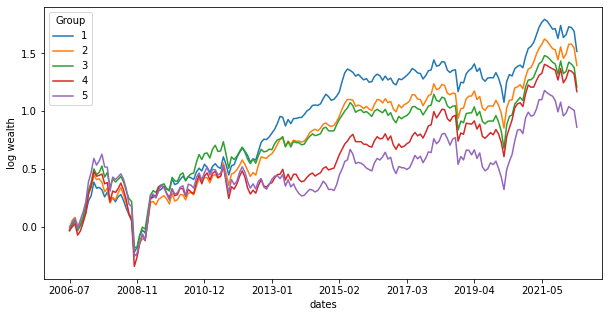

In [15]:
np.log(final_backtest).plot(figsize=(10,5),ylabel='log wealth')
plt.show()